In [ ]:
# http://combine-australia.github.io/RNAseq-R/06-rnaseq-day1.html

In [135]:
# source("http://bioconductor.org/biocLite.R")
# biocLite("limma")
# install.packages('reshape2')


Installing package into 'C:/Users/Pete/Documents/R/win-library/3.5'
(as 'lib' is unspecified)

also installing the dependencies 'magrittr', 'stringi', 'stringr'




package 'magrittr' successfully unpacked and MD5 sums checked
package 'stringi' successfully unpacked and MD5 sums checked
package 'stringr' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Pete\AppData\Local\Temp\RtmpY121p0\downloaded_packages


In [1]:
library(limma)
library(reshape2)
library(Glimma)
library(reshape)
library(edgeR)
# library(Mus.musculus)

Warning message:
"package 'reshape2' was built under R version 3.5.3"
Warning message:
"package 'reshape' was built under R version 3.5.3"

Attaching package: 'reshape'


The following objects are masked from 'package:reshape2':

    colsplit, melt, recast




In [2]:

# change this
setwd("C:\\Users\\Pete\\DSC180B-PROJECT")

In [3]:
file_url = 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE44639&format=file'            
raw_dir = "data/raw/"
temp_dir = "data/temp/"
file_name = 'GSE44639_RAW.tar'

In [4]:
ingest_data <- function(file_url, file_name, raw_dir, temp_dir) {
    if (!dir.exists(raw_dir)) {
        dir.create(raw_dir, recursive = TRUE)
    }
    out = paste(raw_dir, file_name, sep="")
    utils::download.file(file_url, destfile=out, mode="wb")
    utils::untar(out, exdir=temp_dir)
}

ingest_data(file_url, file_name, raw_dir, temp_dir)

In [5]:
read_all_files_in_dir_with_columns <- function(file_dir, required_columns) {
    files <- list.files(path=file_dir)
    
    all <- list()
    
    for (i in files) {
        fp <- paste(file_dir, i, sep='')
        seqdata <- read.delim(gzfile(fp), stringsAsFactors = FALSE)
        columns <- colnames(seqdata)
        
        has_unidentified_col <- FALSE
        
        # ignore samples with columns not present in required_columns
        for (c in columns) {
            if (!any(required_columns==c)) {
                has_unidentified_col <- TRUE
                break
            }
        }
        
        if (has_unidentified_col) {
            next
        }
        
        sampleName = strsplit(fp, "/")[[1]][3]
        sampleName = strsplit(sampleName, ".txt")[[1]][1]
        
        
        cellType = strsplit(fp, "_")[1]
        cellType = cellType[[1]][3]
        cellType = strsplit(cellType, ".txt")
        cellType = cellType[[1]][1]
        
        healthy <- !grepl("P", fp, fixed=TRUE)
        
        # add healthy column
        seqdata$healthy <- healthy
        seqdata$cellType <- cellType
        seqdata$sampleName <- sampleName
        
        if (length(all) == 0) {
            all <- seqdata
        } else {
            all <- rbind(all, seqdata)
        }
    }
    
    return(all)
}

required_columns <- list("miRNA", "Chromosome", "Position", "Strand", "Total.miRNA.reads", "RPM..reads.per.million.")
all <- read_all_files_in_dir_with_columns(temp_dir, required_columns)

In [6]:
all

miRNA,Chromosome,Position,Strand,Total.miRNA.reads,RPM..reads.per.million.,healthy,cellType,sampleName
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<chr>
hsa-miR-378c,chr10,132760851,-,7,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-mir-1321,chrX,85090785,+,26,6,TRUE,Naive,GSM1088200_M7_Naive
hsa-miR-378d,chr8,94928250,-,2,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-miR-2110,chr10,115933864,-,5,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-mir-200b,chr1,1102484,+,2,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-miR-125a-5p,chr19,52196507,+,7,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-mir-671,chr7,150935507,+,1,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-miR-193a-5p,chr17,29887015,+,1,1,TRUE,Naive,GSM1088200_M7_Naive
hsa-mir-378,chr5,149112388,+,4,1,TRUE,Naive,GSM1088200_M7_Naive


# TEST USING MANUALLY CALCULATED RPM


In [ ]:
countmatrix <- dcast(all, miRNA ~ sampleName, value.var= "Total.miRNA.reads", fill= 0)
rownames(countmatrix) <- countmatrix$miRNA
countmatrix$miRNA <- NULL

testcpm <- cpm(countmatrix)
testcpm

In [ ]:
countmatrix

In [ ]:
# Which values in myCPM are greater than 0.5?
thresh <- testcpm > 100
# This produces a logical matrix with TRUEs and FALSEs
head(thresh)

In [ ]:
table(rowSums(thresh))

In [ ]:
# we would like to keep genes that have at least 5 TRUES in each row of thresh
keep <- rowSums(thresh) >= 9
# Subset the rows of countdata to keep the more highly expressed genes
counts.keep <- countdata[keep,]
summary(keep)

In [ ]:
dim(counts.keep)


In [ ]:
y <- DGEList(counts.keep)
# Apply normalisation to DGEList object
y <- calcNormFactors(y)
y

In [ ]:
sampleinfo <- all[row.names(unique(all[,c("sampleName", "cellType", "healthy")])),][,c("sampleName", "healthy", "cellType")]
row.names(sampleinfo) <- NULL

data.frame(sampleinfo$CellType)
head(sampleinfo)

In [ ]:
labels <- paste(sampleinfo$sampleName, sampleinfo$cellType, sampleinfo$healthy)
group <- paste(sampleinfo$cellType,sampleinfo$healthy,sep=".")
group <- factor(group)
glMDSPlot(y, labels=labels, groups=group, folder="mds")

In [ ]:
# our groups
group

In [ ]:
# Specify a design matrix without an intercept term
design <- model.matrix(~ 0 + group)

In [ ]:
colnames(design) <- levels(group)

In [ ]:
par(mfrow=c(1,1))
v <- voom(y,design,plot = TRUE)

In [ ]:
y

In [ ]:
fit <- lmFit(v)
names(fit)

In [ ]:
# we want to compare healthy naive cells to pre-t1 naive cells
cont.matrix <- makeContrasts(B.healthVsdiab=Naive.TRUE - Naive.FALSE,levels=design)
cont.matrix

In [ ]:
fit.cont <- contrasts.fit(fit, cont.matrix)
fit.cont <- eBayes(fit.cont)
dim(fit.cont)


In [ ]:
summa.fit <- decideTests(fit.cont)
summary(summa.fit)

# END TEST

In [35]:
#subset the pre-t1 group from all
pret1 <- all[all$healthy == FALSE,] 


In [36]:
countdata <- dcast(pret1, miRNA ~ sampleName, value.var= "Total.miRNA.reads", fill= 0)

rownames(countdata) <- countdata$miRNA
countdata$miRNA <- NULL
countdata

,GSM1088238_P1_Naive,GSM1088239_P2_Naive,GSM1088240_P3_Naive,GSM1088241_P4_Naive,GSM1088242_P5_Naive,GSM1088243_P6_Naive,GSM1088244_P7_Naive,GSM1088245_P1_rTreg,GSM1088246_P2_rTreg,GSM1088247_P3_rTreg,...,GSM1088270_P5_Tem,GSM1088271_P6_Tem,GSM1088272_P7_Tem,GSM1088273_P1_Ttm,GSM1088274_P2_Ttm,GSM1088275_P3_Ttm,GSM1088276_P4_Ttm,GSM1088277_P5_Ttm,GSM1088278_P6_Ttm,GSM1088279_P7_Ttm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-let-7a,2227,208844,17644,21761,119971,33589,184659,17268,52,13644,...,329,2758,83719,2342,140279,10436,10796,49827,5235,27032
hsa-let-7a-1,39,1169,395,546,3161,511,3948,204,1,170,...,6,394,1339,30,1098,180,125,411,53,495
hsa-let-7a-2,47,1278,442,657,3414,591,4611,230,3,189,...,3,39,1454,39,1228,230,154,513,57,542
hsa-let-7a-3,40,1102,370,515,3083,492,3765,195,1,165,...,3,29,1290,28,1079,171,118,399,53,485
hsa-let-7a*,0,182,1,0,74,1,21,19,0,4,...,0,0,42,9,33,0,1,86,0,1
hsa-let-7b,417,62845,3793,3998,26086,9262,32012,4098,11,4623,...,48,576,31128,807,69246,2955,2540,13038,2849,7231
hsa-let-7b*,1,16,2,3,3,1,3,0,0,5,...,0,0,26,2,12,0,0,4,1,3
hsa-let-7c,55,4387,351,446,2106,838,2597,144,1,128,...,1,17,707,33,811,117,168,391,111,277
hsa-let-7d,223,18389,2119,2140,12295,3334,29294,1420,12,1897,...,21,586,10078,330,13462,1396,1240,6108,743,4348


In [39]:
group<-factor(c(rep("Naive",7),rep("rTreg",7),rep("aTreg",6),rep("Ttm",7),rep("Tcm",7),rep("Tem",7)))

# create model
design2<-model.matrix(~0+group)
design1<-model.matrix(~group)
design<-cbind(design1[,1],design1[,3],design2[,1],design1[,4:6])
colnames(design)<-c("(Intercept)","grouprTreg","groupaTreg","groupTcm","groupTem","groupTtm")


In [41]:
d <- DGEList(counts=countdata,group=group)
nf<-calcNormFactors(d$counts)
design<-model.matrix(~group)

       (Intercept) groupNaive grouprTreg groupTcm groupTem groupTtm
Down             0          8          6        1        0        2
NotSig         879       1540       1547     1559     1561     1558
Up             682         13          8        1        0        1

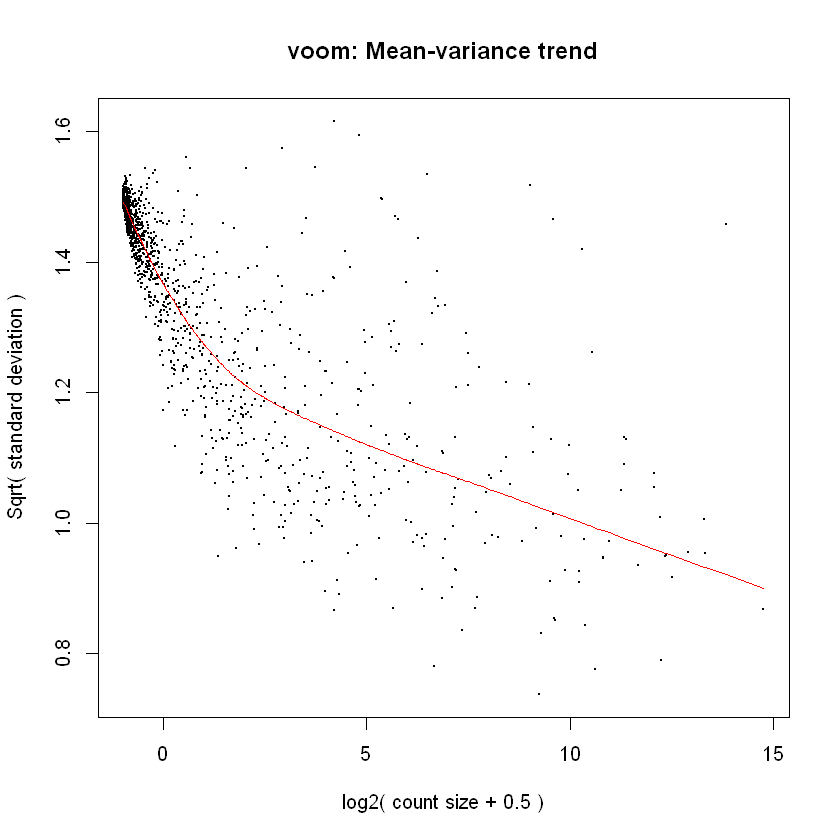

In [42]:
nf<-calcNormFactors(d$counts)
y<-voom(d$counts,plot=TRUE,design,lib.size=colSums(d$counts)*nf)
fit <- lmFit(y,design)
fit <- eBayes(fit)
summary(decideTests(fit))
degene<-topTable(fit,coef=2,n=5)

In [43]:
pret1[8:21]

ERROR: Error in `[.data.frame`(pret1, 8:21): undefined columns selected


In [603]:
# When in doubt, a threshold of 1 CPM in at least the minimum group's sample size is a good rule of thumb.

In [604]:
# print(required_columns)
# countdata <- cast(all, miRNA ~ sampleName, value= 'Total.miRNA.reads', fill= 0)
# countdata

In [605]:
# myCPM <- cpm(countdata)
myCPM <- countdata
head(myCPM)

,GSM1088200_M7_Naive,GSM1088201_M8_Naive,GSM1088202_M9_Naive,GSM1088203_M10_Naive,GSM1088204_M12_Naive,GSM1088205_M29_Naive,GSM1088206_M7_rTreg,GSM1088207_M8_rTreg,GSM1088208_M9_rTreg,GSM1088209_M10_rTreg,...,GSM1088270_P5_Tem,GSM1088271_P6_Tem,GSM1088272_P7_Tem,GSM1088273_P1_Ttm,GSM1088274_P2_Ttm,GSM1088275_P3_Ttm,GSM1088276_P4_Ttm,GSM1088277_P5_Ttm,GSM1088278_P6_Ttm,GSM1088279_P7_Ttm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-let-7a,154,65,3731,5988,2425,70990,13,52,78,6853,...,3002,635,5463,1021,9086,3628,1246,3324,698,2985
hsa-let-7a-1,6,1,54,264,63,770,0,7,1,89,...,54,90,87,13,71,62,14,27,7,54
hsa-let-7a-2,6,2,68,111,75,803,0,1,2,104,...,27,8,94,17,79,79,17,34,7,59
hsa-let-7a-3,5,1,53,91,61,759,0,1,1,86,...,27,6,84,12,69,59,13,26,7,53
hsa-let-7a*,0,0,0,0,1,13,0,0,0,0,...,0,0,2,3,2,0,1,5,0,1
hsa-let-7b,55,75,1103,654,881,19192,16,5,41,4899,...,438,132,2031,351,4485,1027,293,869,380,798


In [619]:
# Which values in myCPM are greater than 0.5?
thresh <- myCPM > 1
# This produces a logical matrix with TRUEs and FALSEs
head(thresh)

,GSM1088200_M7_Naive,GSM1088201_M8_Naive,GSM1088202_M9_Naive,GSM1088203_M10_Naive,GSM1088204_M12_Naive,GSM1088205_M29_Naive,GSM1088206_M7_rTreg,GSM1088207_M8_rTreg,GSM1088208_M9_rTreg,GSM1088209_M10_rTreg,...,GSM1088270_P5_Tem,GSM1088271_P6_Tem,GSM1088272_P7_Tem,GSM1088273_P1_Ttm,GSM1088274_P2_Ttm,GSM1088275_P3_Ttm,GSM1088276_P4_Ttm,GSM1088277_P5_Ttm,GSM1088278_P6_Ttm,GSM1088279_P7_Ttm
hsa-let-7a,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
hsa-let-7a-1,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
hsa-let-7a-2,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
hsa-let-7a-3,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
hsa-let-7a*,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
hsa-let-7b,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [620]:
table(rowSums(thresh))


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1095  122   47   37   19   22   15   16    8    9    3    9    7    3    3    7 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   31   32 
   3    3    4    7    5    4    5    7    5    3    2    4    3    4    2    2 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   4    2    6    3    4    4    5    4    6    2    4    2    3    1    3    3 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    3    1    5    4    1    7    1    8    4    3    4    3    2    2    4 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
   1    2    9    6    8    7    3    5    8    2    6    5   10   11   16 

In [630]:
# we would like to keep genes that have at least 5 TRUES in each row of thresh
keep <- rowSums(thresh) >= 7
# Subset the rows of countdata to keep the more highly expressed genes
counts.keep <- countdata[keep,]
summary(keep)

   Mode   FALSE    TRUE 
logical    1357     336 

In [631]:
dim(counts.keep)


[1] 336  79

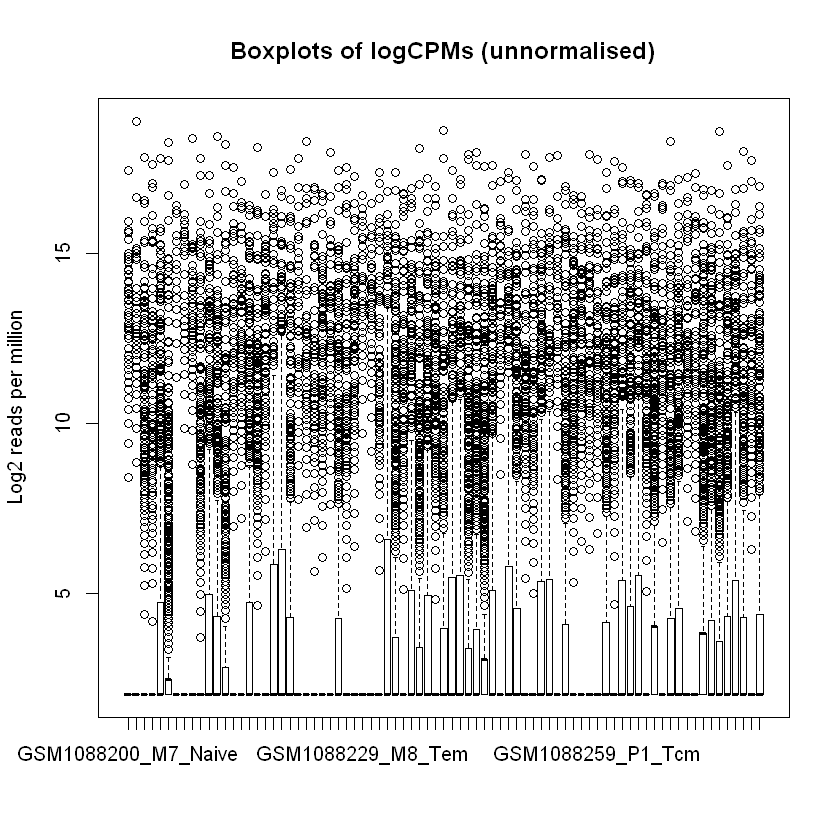

In [632]:
# rownames(counts.keep) <- counts.keep$miRNA
# counts.keep$miRNA <- NULL
# counts.keep

# Get log2 counts per million
logcounts <- cpm(countdata, log=TRUE)
# Check distributions of samples using boxplots
boxplot(logcounts, xlab="", ylab="Log2 reads per million")
# Let's add a blue horizontal line that corresponds to the median logCPM
# abline(h=median(logcounts),col="blue")
title("Boxplots of logCPMs (unnormalised)")


In [633]:

y2 <- DGEList(countdata)
# Apply normalisation to DGEList object
y2 <- calcNormFactors(y2)
y2

,GSM1088200_M7_Naive,GSM1088201_M8_Naive,GSM1088202_M9_Naive,GSM1088203_M10_Naive,GSM1088204_M12_Naive,GSM1088205_M29_Naive,GSM1088206_M7_rTreg,GSM1088207_M8_rTreg,GSM1088208_M9_rTreg,GSM1088209_M10_rTreg,...,GSM1088270_P5_Tem,GSM1088271_P6_Tem,GSM1088272_P7_Tem,GSM1088273_P1_Ttm,GSM1088274_P2_Ttm,GSM1088275_P3_Ttm,GSM1088276_P4_Ttm,GSM1088277_P5_Ttm,GSM1088278_P6_Ttm,GSM1088279_P7_Ttm
hsa-let-7a,154,65,3731,5988,2425,70990,13,52,78,6853,...,3002,635,5463,1021,9086,3628,1246,3324,698,2985
hsa-let-7a-1,6,1,54,264,63,770,0,7,1,89,...,54,90,87,13,71,62,14,27,7,54
hsa-let-7a-2,6,2,68,111,75,803,0,1,2,104,...,27,8,94,17,79,79,17,34,7,59
hsa-let-7a-3,5,1,53,91,61,759,0,1,1,86,...,27,6,84,12,69,59,13,26,7,53
hsa-let-7a*,0,0,0,0,1,13,0,0,0,0,...,0,0,2,3,2,0,1,5,0,1
hsa-let-7b,55,75,1103,654,881,19192,16,5,41,4899,...,438,132,2031,351,4485,1027,293,869,380,798
hsa-let-7b*,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,1,0,0,1,1,1
hsa-let-7c,4,1,140,198,40,747,3,2,27,80,...,9,3,46,14,52,40,19,26,14,30
hsa-let-7d,10,10,376,1178,332,5436,1,23,8,653,...,191,135,657,143,871,485,143,407,99,480
hsa-let-7d*,0,0,4,2,3,5,0,0,1,1,...,0,1,7,10,1,1,1,2,1,3


In [634]:
y <- DGEList(counts.keep)
# Apply normalisation to DGEList object
y <- calcNormFactors(y)
y

,GSM1088200_M7_Naive,GSM1088201_M8_Naive,GSM1088202_M9_Naive,GSM1088203_M10_Naive,GSM1088204_M12_Naive,GSM1088205_M29_Naive,GSM1088206_M7_rTreg,GSM1088207_M8_rTreg,GSM1088208_M9_rTreg,GSM1088209_M10_rTreg,...,GSM1088270_P5_Tem,GSM1088271_P6_Tem,GSM1088272_P7_Tem,GSM1088273_P1_Ttm,GSM1088274_P2_Ttm,GSM1088275_P3_Ttm,GSM1088276_P4_Ttm,GSM1088277_P5_Ttm,GSM1088278_P6_Ttm,GSM1088279_P7_Ttm
hsa-let-7a,154,65,3731,5988,2425,70990,13,52,78,6853,...,3002,635,5463,1021,9086,3628,1246,3324,698,2985
hsa-let-7a-1,6,1,54,264,63,770,0,7,1,89,...,54,90,87,13,71,62,14,27,7,54
hsa-let-7a-2,6,2,68,111,75,803,0,1,2,104,...,27,8,94,17,79,79,17,34,7,59
hsa-let-7a-3,5,1,53,91,61,759,0,1,1,86,...,27,6,84,12,69,59,13,26,7,53
hsa-let-7a*,0,0,0,0,1,13,0,0,0,0,...,0,0,2,3,2,0,1,5,0,1
hsa-let-7b,55,75,1103,654,881,19192,16,5,41,4899,...,438,132,2031,351,4485,1027,293,869,380,798
hsa-let-7c,4,1,140,198,40,747,3,2,27,80,...,9,3,46,14,52,40,19,26,14,30
hsa-let-7d,10,10,376,1178,332,5436,1,23,8,653,...,191,135,657,143,871,485,143,407,99,480
hsa-let-7d*,0,0,4,2,3,5,0,0,1,1,...,0,1,7,10,1,1,1,2,1,3
hsa-let-7e,2,7,37,55,26,539,1,1,1,44,...,27,10,97,8,217,45,20,61,16,43


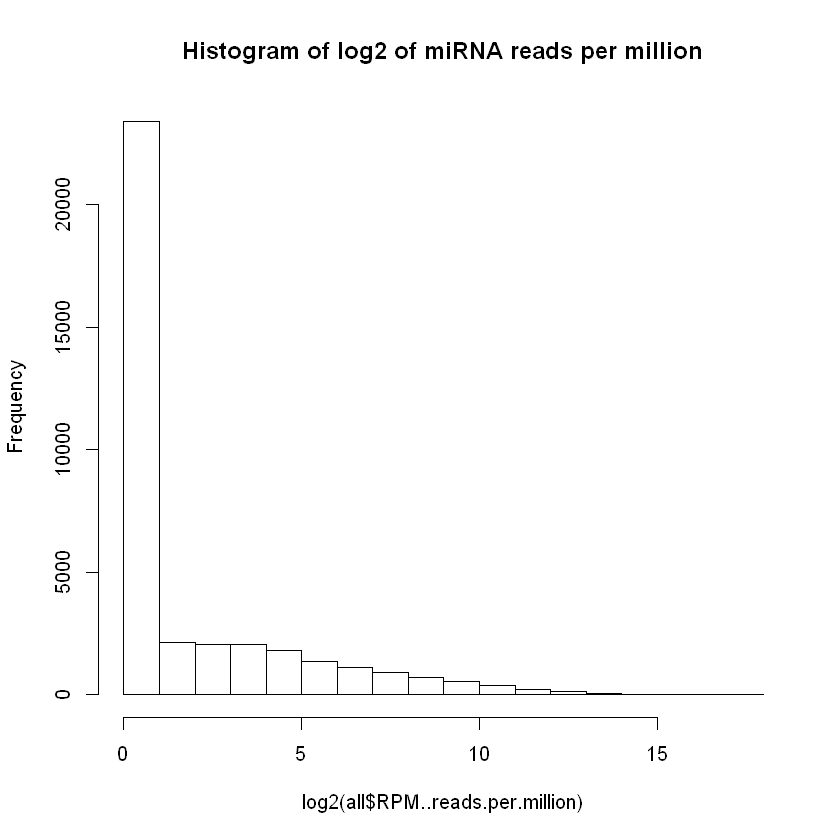

In [635]:
hist(log2(all$RPM..reads.per.million), main='Histogram of log2 of miRNA reads per million')

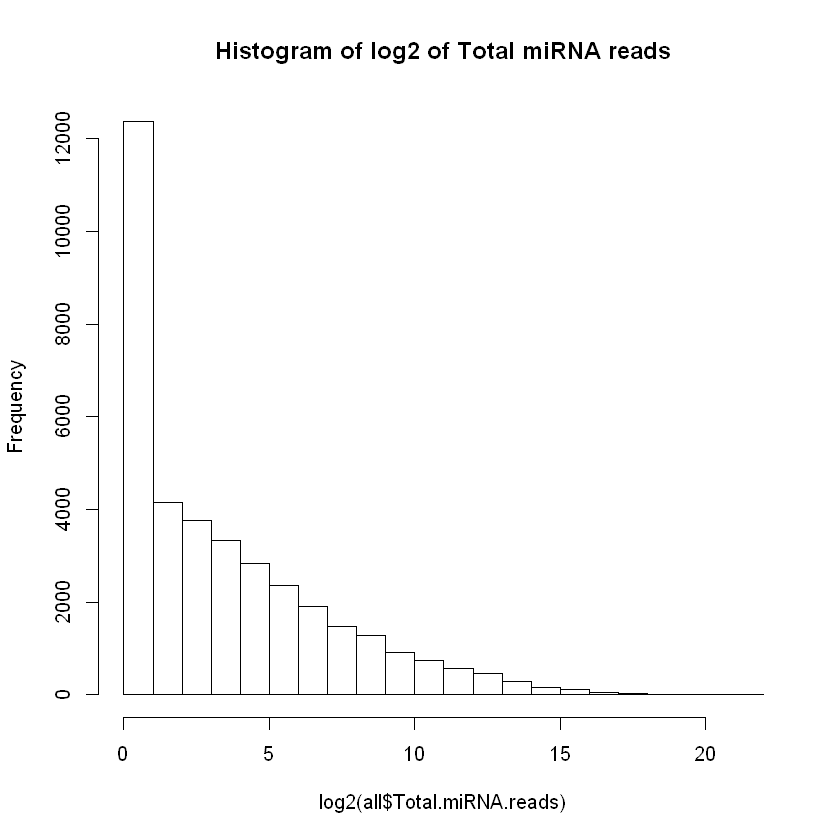

In [636]:
hist(log2(all$"Total.miRNA.reads"), main='Histogram of log2 of Total miRNA reads')


In [637]:
counts.keep

,GSM1088200_M7_Naive,GSM1088201_M8_Naive,GSM1088202_M9_Naive,GSM1088203_M10_Naive,GSM1088204_M12_Naive,GSM1088205_M29_Naive,GSM1088206_M7_rTreg,GSM1088207_M8_rTreg,GSM1088208_M9_rTreg,GSM1088209_M10_rTreg,...,GSM1088270_P5_Tem,GSM1088271_P6_Tem,GSM1088272_P7_Tem,GSM1088273_P1_Ttm,GSM1088274_P2_Ttm,GSM1088275_P3_Ttm,GSM1088276_P4_Ttm,GSM1088277_P5_Ttm,GSM1088278_P6_Ttm,GSM1088279_P7_Ttm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-let-7a,154,65,3731,5988,2425,70990,13,52,78,6853,...,3002,635,5463,1021,9086,3628,1246,3324,698,2985
hsa-let-7a-1,6,1,54,264,63,770,0,7,1,89,...,54,90,87,13,71,62,14,27,7,54
hsa-let-7a-2,6,2,68,111,75,803,0,1,2,104,...,27,8,94,17,79,79,17,34,7,59
hsa-let-7a-3,5,1,53,91,61,759,0,1,1,86,...,27,6,84,12,69,59,13,26,7,53
hsa-let-7a*,0,0,0,0,1,13,0,0,0,0,...,0,0,2,3,2,0,1,5,0,1
hsa-let-7b,55,75,1103,654,881,19192,16,5,41,4899,...,438,132,2031,351,4485,1027,293,869,380,798
hsa-let-7c,4,1,140,198,40,747,3,2,27,80,...,9,3,46,14,52,40,19,26,14,30
hsa-let-7d,10,10,376,1178,332,5436,1,23,8,653,...,191,135,657,143,871,485,143,407,99,480
hsa-let-7d*,0,0,4,2,3,5,0,0,1,1,...,0,1,7,10,1,1,1,2,1,3


In [638]:
sampleinfo <- all[row.names(unique(all[,c("sampleName", "cellType", "healthy")])),][,c("sampleName", "healthy", "cellType")]
row.names(sampleinfo) <- NULL

data.frame(sampleinfo$CellType)
head(sampleinfo)

<0 x 0 matrix>

,sampleName,healthy,cellType
,<chr>,<lgl>,<chr>
1,GSM1088200_M7_Naive,TRUE,Naive
2,GSM1088201_M8_Naive,TRUE,Naive
3,GSM1088202_M9_Naive,TRUE,Naive
4,GSM1088203_M10_Naive,TRUE,Naive
5,GSM1088204_M12_Naive,TRUE,Naive
6,GSM1088205_M29_Naive,TRUE,Naive


In [639]:
labels <- paste(sampleinfo$sampleName, sampleinfo$cellType, sampleinfo$healthy)
group <- paste(sampleinfo$healthy,sep=".")
group <- factor(group)
glMDSPlot(y, labels=labels, groups=group, folder="mds")

In [640]:
# our groups
group

[1] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
[13] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
[25] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
[37] TRUE  TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE

In [517]:
# Specify a design matrix without an intercept term
design <- model.matrix(~ 0 + group)

In [518]:
colnames(design) <- levels(group)

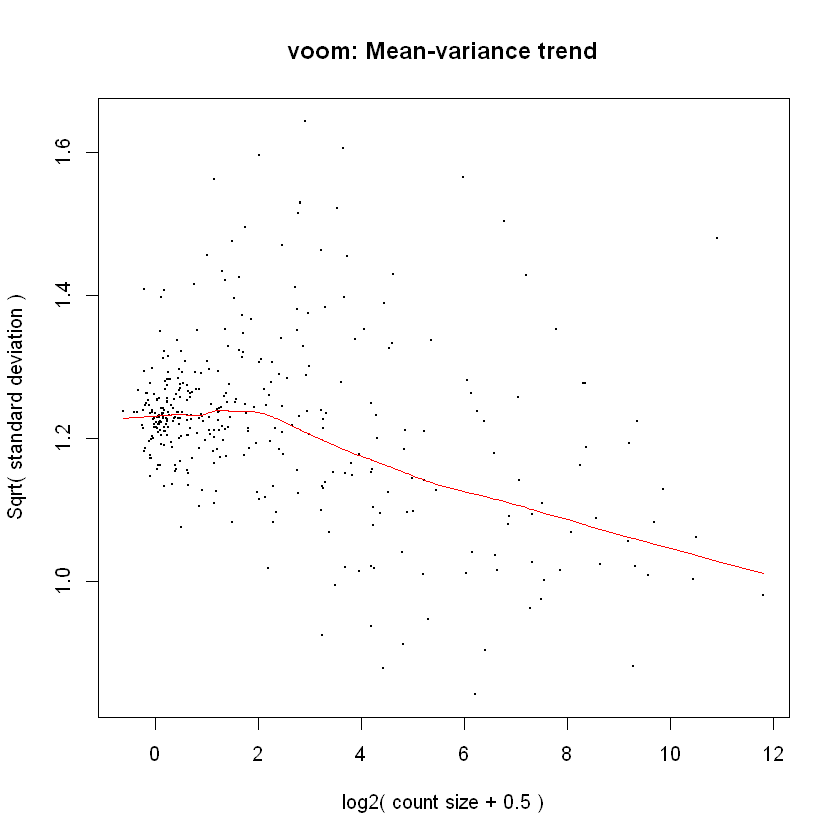

In [519]:
par(mfrow=c(1,1))
v <- voom(y,design,plot = TRUE)

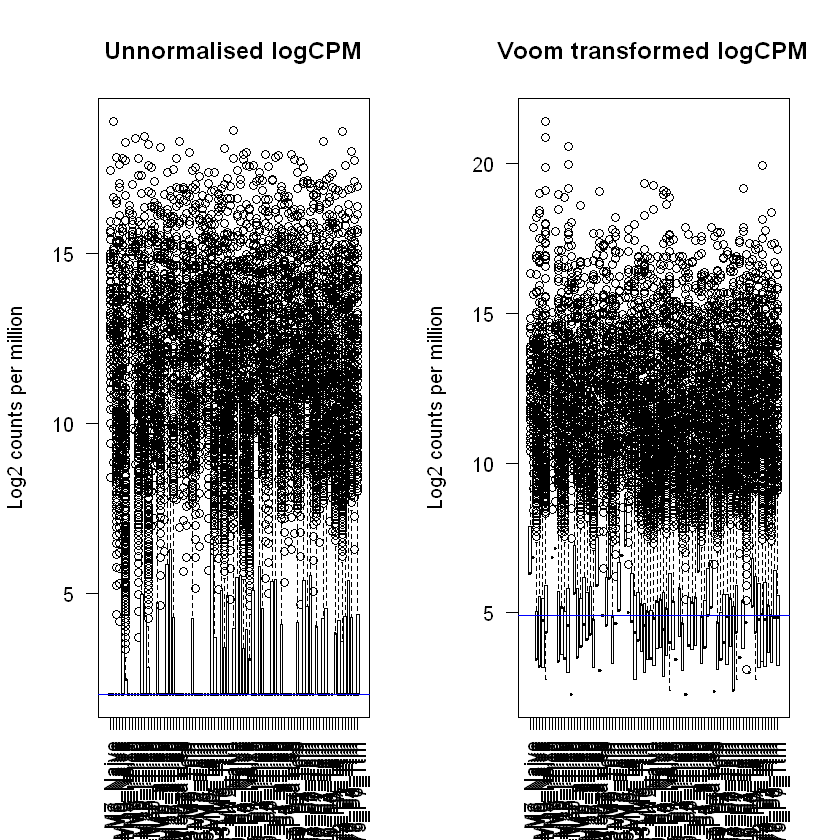

In [428]:
par(mfrow=c(1,2))
boxplot(logcounts, xlab="", ylab="Log2 counts per million",las=2,main="Unnormalised logCPM")
## Let's add a blue horizontal line that corresponds to the median logCPM
abline(h=median(logcounts),col="blue")
boxplot(v$E, xlab="", ylab="Log2 counts per million",las=2,main="Voom transformed logCPM")
## Let's add a blue horizontal line that corresponds to the median logCPM
abline(h=median(v$E),col="blue")

In [429]:
names(v)

[1] "targets" "E"       "weights" "design"

In [430]:
fit <- lmFit(v)
names(fit)

[1] "coefficients"     "stdev.unscaled"   "sigma"            "df.residual"     
 [5] "cov.coefficients" "pivot"            "rank"             "Amean"           
 [9] "method"           "design"

In [441]:
# we want to compare healthy naive cells to pre-t1 naive cells
cont.matrix <- makeContrasts(B.healthVsdiab=Naive.TRUE - Naive.FALSE,levels=design)
cont.matrix

,B.healthVsdiab
aTreg.FALSE,0
aTreg.TRUE,0
Naive.FALSE,-1
Naive.TRUE,1
rTreg.FALSE,0
rTreg.TRUE,0
Tcm.FALSE,0
Tcm.TRUE,0
Tem.FALSE,0
Tem.TRUE,0


In [442]:
fit.cont <- contrasts.fit(fit, cont.matrix)
fit.cont <- eBayes(fit.cont)
dim(fit.cont)


[1] 969   1

In [443]:
summa.fit <- decideTests(fit.cont)
summary(summa.fit)

       B.healthVsdiab
Down                0
NotSig            969
Up                  0

In [452]:
topTable(fit.cont,coef="B.healthVsdiab",sort.by="logFC", number=30)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-miR-375,2.968130,5.128626,3.755719,0.0002432493,0.2357086,-2.926265
hsa-miR-221,-2.127111,10.378979,-2.465001,0.0147805487,0.6551815,-3.977829
hsa-miR-217,2.093158,4.344910,2.945016,0.0037217702,0.6551815,-3.584720
hsa-miR-374a,-2.020481,9.573584,-2.389887,0.0180415902,0.6551815,-4.026217
hsa-miR-122,2.014880,5.197745,2.454129,0.0152175072,0.6551815,-3.938468
hsa-miR-3591-3p,1.978164,5.151894,2.426647,0.0163736444,0.6551815,-3.955739
hsa-miR-3065-5p,1.898927,5.350217,2.553791,0.0116099424,0.6551815,-3.885490
hsa-miR-363*,1.796559,4.431306,2.540950,0.0120271530,0.6551815,-3.877926
hsa-miR-484,-1.689211,8.646106,-2.048279,0.0422016234,0.6551815,-4.216301


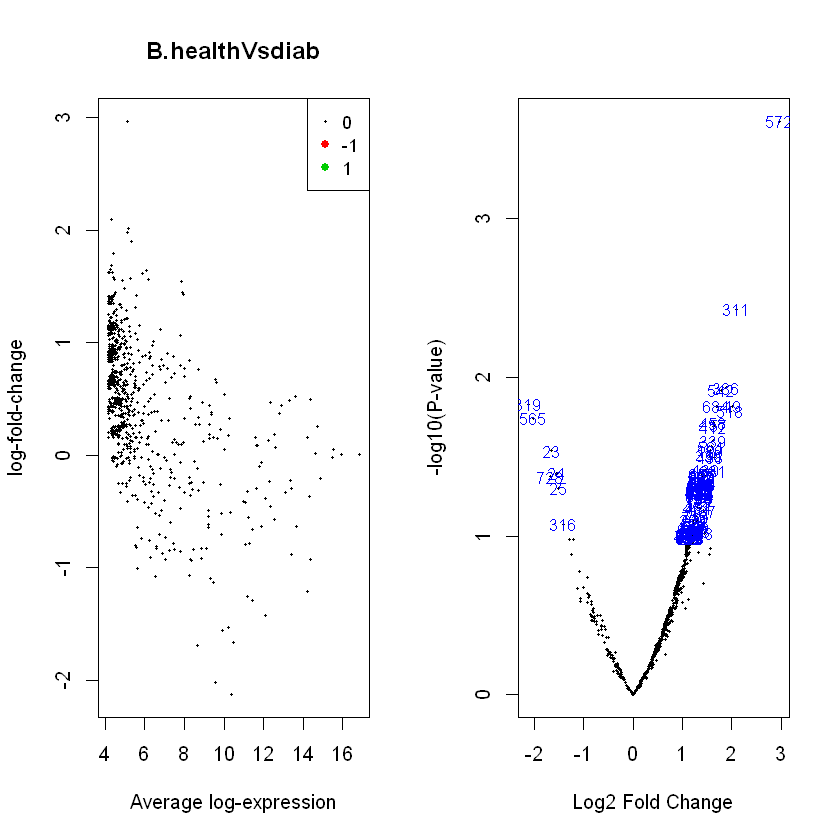

In [445]:
par(mfrow=c(1,2))
plotMD(fit.cont,coef=1,status=summa.fit[,"B.healthVsdiab"], values = c(-1, 1))

# For the volcano plot we have to specify how many of the top genes to highlight.
# We can also specify that we want to plot the gene symbol for the highlighted genes.
# let's highlight the top 100 most DE genes
volcanoplot(fit.cont,coef=1,highlight=100,names=fit.cont$genes$SYMBOL)

In [447]:
fit.cont

,B.healthVsdiab
hsa-let-7a,-0.023798784
hsa-let-7a-1,0.381637457
hsa-let-7a-2,0.189419453
hsa-let-7a-3,0.125511239
hsa-let-7a*,0.524942462
hsa-let-7b,0.524193519
hsa-let-7b*,0.023014078
hsa-let-7c,0.153674946
hsa-let-7d,0.065817234
hsa-let-7d*,0.827993365
